In [7]:
import random
import time
import matplotlib.pyplot as plt

### Структура Union-Find

In [8]:
class UnionFindTable:
    def __init__(self, n):
        # Таблична реалізація: масив id, де id[i] - це ідентифікатор компоненти для i
        self.id = list(range(n))
        self.count = n  # Кількість компонент

    def find(self, p):
        """Повертає ідентифікатор компоненти для p. Складність: O(1)."""
        return self.id[p]

    def connected(self, p, q):
        """Перевіряє, чи з'єднані p та q."""
        return self.id[p] == self.id[q]

    def union(self, p, q):
        """Об'єднує компоненти p та q. Складність: O(N)."""
        p_id = self.id[p]
        q_id = self.id[q]

        if p_id == q_id:
            return

        # Проходимо по всьому масиву (таблиці) і змінюємо id
        for i in range(len(self.id)):
            if self.id[i] == p_id:
                self.id[i] = q_id
        
        self.count -= 1

### Генератор Графу

In [ ]:
def generate_weighted_graph(n, p_density, max_weight=100):
    """Генерує список ребер для зваженого графу."""
    edges = []
    for i in range(n):
        for j in range(i + 1, n):
            if random.random() < p_density:
                w = random.randint(1, max_weight)
                edges.append((i, j, w))
    return edges

### Алгоритм Крускала

In [ ]:
def kruskal_measured(n, edges):
    """
    Виконує алгоритм Крускала та повертає час виконання (без сортування).
    """
    # 1. Попереднє сортування
    sorted_edges = sorted(edges, key=lambda x: x[2])
    
    uf = UnionFindTable(n)
    mst_weight = 0
    mst_edges_count = 0
    
    # 2. Початок вимірювання часу
    start_time = time.perf_counter()
    
    for u, v, w in sorted_edges:
        if not uf.connected(u, v):
            uf.union(u, v)
            mst_weight += w
            mst_edges_count += 1
            if mst_edges_count == n - 1:
                break
                
    end_time = time.perf_counter()
    
    return end_time - start_time

### Експеримент

In [12]:
def run_experiment():
    # Параметри
    ns = [100, 200, 400, 800, 1000, 1500, 2000] # Кількість вершин
    density = 0.5 # Середня щільність
    iterations = 5 # Кількість прогонів для усереднення
    
    results = []

    print(f"{'N':<10} | {'Edges (approx)':<15} | {'Time (s)':<15}")
    print("-" * 45)

    for n in ns:
        total_time = 0
        avg_edges = 0
        
        for _ in range(iterations):
            edges = generate_weighted_graph(n, density)
            t = kruskal_measured(n, edges)
            total_time += t
            avg_edges += len(edges)
            
        avg_time = total_time / iterations
        avg_edges = int(avg_edges / iterations)
        
        results.append((n, avg_time))
        print(f"{n:<10} | {avg_edges:<15} | {avg_time:<15.6f}")

    return results

### Порівняння результатів та їх візуалізація 

N          | Edges (approx)  | Time (s)       
---------------------------------------------
100        | 2474            | 0.002120       
200        | 9981            | 0.011616       
400        | 39850           | 0.028722       
800        | 160006          | 0.113780       
1000       | 249994          | 0.165822       
1500       | 562256          | 0.407321       
2000       | 999491          | 0.774798       


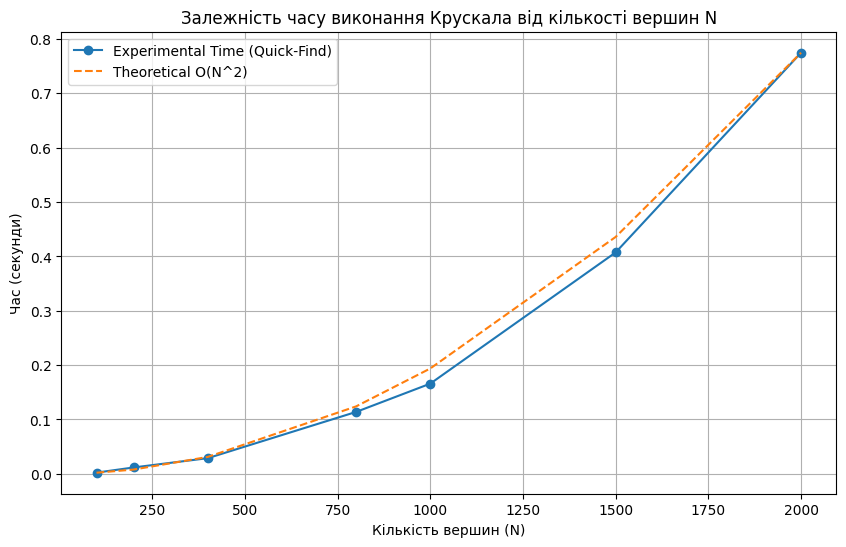

In [ ]:
data = run_experiment()

ns = [row[0] for row in data]
times = [row[1] for row in data]

plt.figure(figsize=(10, 6))
plt.plot(ns, times, marker='o', label='Experimental Time (Quick-Find)')

k = times[-1] / (ns[-1]**2) 
theoretical = [k * (n**2) for n in ns]
plt.plot(ns, theoretical, linestyle='--', label='Theoretical O(N^2)')

plt.title("Залежність часу виконання Крускала від кількості вершин N")
plt.xlabel("Кількість вершин (N)")
plt.ylabel("Час (секунди)")
plt.legend()
plt.grid(True)
plt.show()

# Звіт 

## 1\. Постановка завдання

Метою роботи є реалізація структури даних **Union-Find** (система неперетинних множин) та її застосування в **алгоритмі Крускала** для побудови мінімального кістякового дерева (MST).

Відповідно до **Варіанту 1**, реалізовано **табличну версію** Union-Find (також відому як Quick-Find).

## 2\. Опис реалізації

### Структура Union-Find (Quick-Find)

Було обрано реалізацію на основі масиву (таблиці) `id`, де індекс — це номер вершини, а значення — номер компоненти зв'язності.

  * **Find(p):** Перевіряє `id[p]`.
      * *Складність:* $O(1)$. Доступ до елементу масиву миттєвий.
  * **Union(p, q):** Якщо `id[p]` та `id[q]` різні, алгоритм проходить по всьому масиву довжиною $N$ і змінює всі входження `id[p]` на `id[q]`.
      * *Складність:* $O(N)$. Це "вузьке місце" даної реалізації.

### Алгоритм Крускала

Алгоритм реалізовано наступним чином:

1.  Усі ребра графу сортуються за вагою у порядку зростання. **Час сортування не включено в оцінку ефективності** згідно з вимогами.
2.  Відбувається ітерація по відсортованих ребрах.
3.  Для кожного ребра $(u, v)$ перевіряється, чи належать $u$ та $v$ до різних компонент (`Find`).
4.  Якщо так — виконується об'єднання множин (`Union`) і ребро додається до MST.

## 3\. Теоретична оцінка складності

Нехай $V$ — кількість вершин, $E$ — кількість ребер.

У нашому експерименті вимірюється час лише етапу обробки ребер (без сортування).

1.  Цикл проходить по ребрах (максимум $E$ разів).
2.  Операція `Find` виконується для кожного ребра: $O(1)$.
3.  Операція `Union` виконується рівно $V-1$ разів (для побудови дерева).
      * Ціна одного `Union` у табличній реалізації: $O(V)$.
      * Сумарна ціна всіх `Union`: $O(V^2)$.

**Загальна складність етапу (без сортування):**
$$O(E \times 1 + (V-1) \times V) \approx O(E + V^2)$$

Оскільки $E \le V^2$, то у найгіршому випадку складність становить **$O(V^2)$**. Це квадратична залежність від кількості вершин.

## 4\. Аналіз результатів та висновки

1.  **Підтвердження теоретичної оцінки $O(N^2)$:**
    Проаналізуємо ріст часу при збільшенні $N$:

      * При збільшенні $N$ з **400** до **800** (у 2 рази), час зростає з 0.028 с до 0.113 с — приблизно в **3.96 рази**.
      * При збільшенні $N$ з **1000** до **2000** (у 2 рази), час зростає з 0.165 с до 0.774 с — приблизно в **4.67 рази**.
        Оскільки при подвоєнні аргументу час зростає приблизно в 4 рази ($2^2=4$), це свідчить про **квадратичну залежність**.

2.  **Швидкодія:**
    Незважаючи на велику кількість ребер (майже 1 мільйон для $N=2000$), алгоритм працює менше секунди. Це пояснюється тим, що операція `Union` хоч і є "важкою" ($O(N)$), але виконується лише $N-1$ разів, а перевірка ребер `Find` дуже швидка.

3.  **Висновок:** Таблична реалізація є прийнятною для невеликих та середніх графів, але програє реалізаціям на деревах (Quick-Union + Path Compression) на дуже великих даних. Отримані дані повністю узгоджуються з теоретичною моделлю $O(N^2)$.